# Urban Crime Rates: Data Preprocessing and Visualization.

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
df = pd.read_csv(r'crime.csv')
df.head()

,Unnamed: 0,longitude,latitude,ccn,report_date,shift,method,offense,block,xblock,...,block_group,census_tract,voting_precinct,latitude.1,longitude.1,bid,start_date,end_date,location,offense_group
0,0,-76.988311,38.900209,23151247,2023/09/13 16:39:06+00,DAY,OTHERS,MOTOR VEHICLE THEFT,H STREET NE AND 13TH STREET NE,401014.179999,...,008410 1,8410.0,Precinct 82,38.900201,-76.988308,NaN,2023/09/13 15:15:00+00,2023/09/13 16:38:00+00,latitude 38.900209\nlatitude 38.900201\n...,property
1,1,-76.966731,38.876371,23050047,2023/04/01 11:14:02+00,DAY,OTHERS,THEFT F/AUTO,2900 - 2943 BLOCK OF NELSON PLACE SE,402887.000000,...,007709 1,7709.0,Precinct 111,38.876364,-76.966729,NaN,2023/04/01 10:42:00+00,2023/04/01 11:00:00+00,latitude 38.876371\nlatitude 38.876364\n...,property
2,2,-77.031962,38.908045,23022454,2023/02/10 20:12:13+00,EVENING,OTHERS,ROBBERY,1300 - 1399 BLOCK OF 14TH STREET NW,397228.000000,...,005003 1,5003.0,Precinct 17,38.908037,-77.031960,NaN,2023/02/10 18:46:00+00,2023/02/10 18:56:00+00,latitude 38.908045\nlatitude 38.908037\n...,violent
3,3,-77.061651,38.948787,23022494,2023/02/10 21:17:57+00,EVENING,OTHERS,THEFT F/AUTO,4500 - 4599 BLOCK OF 30TH STREET NW,394656.000000,...,001301 1,1301.0,Precinct 138,38.948779,-77.061649,NaN,2023/02/09 11:00:00+00,2023/02/10 19:00:00+00,latitude 38.948787\nlatitude 38.948779\n...,property
4,4,-76.946967,38.893357,23127098,2023/08/04 19:00:04+00,DAY,OTHERS,THEFT/OTHER,300 - 499 BLOCK OF 40TH STREET NE,404600.899906,...,009603 2,9603.0,Precinct 102,38.893349,-76.946965,NaN,2023/08/04 18:40:00+00,2023/08/04 18:53:00+00,latitude 38.893357\nlatitude 38.893349\n...,property


## Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34925 entries, 0 to 34924
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            34925 non-null  int64  
 1   longitude             34925 non-null  float64
 2   latitude              34925 non-null  float64
 3   ccn                   34925 non-null  int64  
 4   report_date           34925 non-null  object 
 5   shift                 34925 non-null  object 
 6   method                34925 non-null  object 
 7   offense               34925 non-null  object 
 8   block                 34925 non-null  object 
 9   xblock                34925 non-null  float64
 10  yblock                34925 non-null  float64
 11  ward                  34920 non-null  float64
 12  anc                   34920 non-null  object 
 13  district              34925 non-null  float64
 14  psa                   34611 non-null  float64
 15  neighborhood_cluste

In [4]:
df.nunique()

Unnamed: 0              34241
longitude               11562
latitude                11562
ccn                     34907
report_date             34812
shift                       3
method                      3
offense                     9
block                    8391
xblock                   9360
yblock                   9547
ward                        8
anc                        46
district                    7
psa                        57
neighborhood_cluster       45
block_group               569
census_tract              206
voting_precinct           144
latitude.1              11560
longitude.1             11562
bid                        11
start_date              30566
end_date                28296
location                34925
offense_group               2
dtype: int64

In [19]:
df.describe()

,longitude,latitude,psa
count,34925.000000,34925.000000,34611.000000
mean,-77.007964,38.907408,379.703042
std,0.034752,0.030486,185.153677
min,-77.112318,38.814667,101.000000
25%,-77.031494,38.892873,208.000000
50%,-77.010662,38.908484,401.000000
75%,-76.986857,38.925441,506.000000
max,-76.910014,38.993573,708.000000


In [6]:
df.isnull().sum()

Unnamed: 0                  0
longitude                   0
latitude                    0
ccn                         0
report_date                 0
shift                       0
method                      0
offense                     0
block                       0
xblock                      0
yblock                      0
ward                        5
anc                         5
district                    0
psa                       314
neighborhood_cluster        5
block_group                16
census_tract               16
voting_precinct             6
latitude.1                  0
longitude.1                 0
bid                     28611
start_date                  1
end_date                 2795
location                    0
offense_group               0
dtype: int64

In [7]:
print(df['offense'].value_counts())

offense
THEFT/OTHER                   13547
THEFT F/AUTO                   7903
MOTOR VEHICLE THEFT            6937
ROBBERY                        3517
ASSAULT W/DANGEROUS WEAPON     1426
BURGLARY                       1116
HOMICIDE                        275
SEX ABUSE                       192
ARSON                            12
Name: count, dtype: int64


## Data Cleaning

In [8]:
df = df.drop(['Unnamed: 0','ccn','xblock','yblock','ward','anc', 'district', 'block_group', 'census_tract','latitude.1', 'longitude.1', 'start_date','end_date', 'location'], axis = 1)
df.head()

,longitude,latitude,report_date,shift,method,offense,block,psa,neighborhood_cluster,voting_precinct,bid,offense_group
0,-76.988311,38.900209,2023/09/13 16:39:06+00,DAY,OTHERS,MOTOR VEHICLE THEFT,H STREET NE AND 13TH STREET NE,104.0,Cluster 25,Precinct 82,NaN,property
1,-76.966731,38.876371,2023/04/01 11:14:02+00,DAY,OTHERS,THEFT F/AUTO,2900 - 2943 BLOCK OF NELSON PLACE SE,605.0,Cluster 34,Precinct 111,NaN,property
2,-77.031962,38.908045,2023/02/10 20:12:13+00,EVENING,OTHERS,ROBBERY,1300 - 1399 BLOCK OF 14TH STREET NW,307.0,Cluster 7,Precinct 17,NaN,violent
3,-77.061651,38.948787,2023/02/10 21:17:57+00,EVENING,OTHERS,THEFT F/AUTO,4500 - 4599 BLOCK OF 30TH STREET NW,203.0,Cluster 12,Precinct 138,NaN,property
4,-76.946967,38.893357,2023/08/04 19:00:04+00,DAY,OTHERS,THEFT/OTHER,300 - 499 BLOCK OF 40TH STREET NE,603.0,Cluster 32,Precinct 102,NaN,property


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34925 entries, 0 to 34924
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             34925 non-null  float64
 1   latitude              34925 non-null  float64
 2   report_date           34925 non-null  object 
 3   shift                 34925 non-null  object 
 4   method                34925 non-null  object 
 5   offense               34925 non-null  object 
 6   block                 34925 non-null  object 
 7   psa                   34611 non-null  float64
 8   neighborhood_cluster  34920 non-null  object 
 9   voting_precinct       34919 non-null  object 
 10  bid                   6314 non-null   object 
 11  offense_group         34925 non-null  object 
dtypes: float64(3), object(9)
memory usage: 3.2+ MB


In [10]:
df.describe()

,longitude,latitude,psa
count,34925.000000,34925.000000,34611.000000
mean,-77.007964,38.907408,379.703042
std,0.034752,0.030486,185.153677
min,-77.112318,38.814667,101.000000
25%,-77.031494,38.892873,208.000000
50%,-77.010662,38.908484,401.000000
75%,-76.986857,38.925441,506.000000
max,-76.910014,38.993573,708.000000


## EDA (Exploratory Data Analysis)

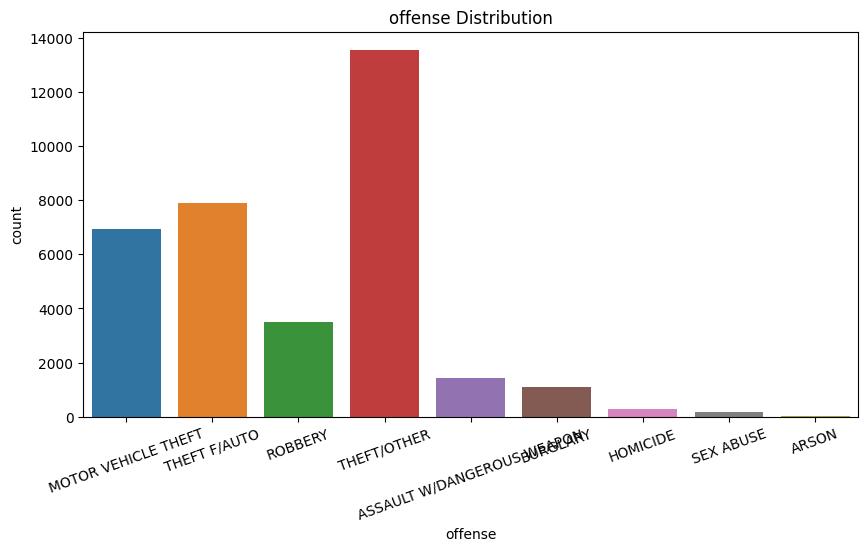

In [11]:
plt.figure(figsize = (10,5))
sns.countplot(data=df, x='offense')
plt.title('offense Distribution')
plt.xticks(rotation = 20)
plt.show()

# Result:
The above plot represents count plot of the "offense" column of the dataset.

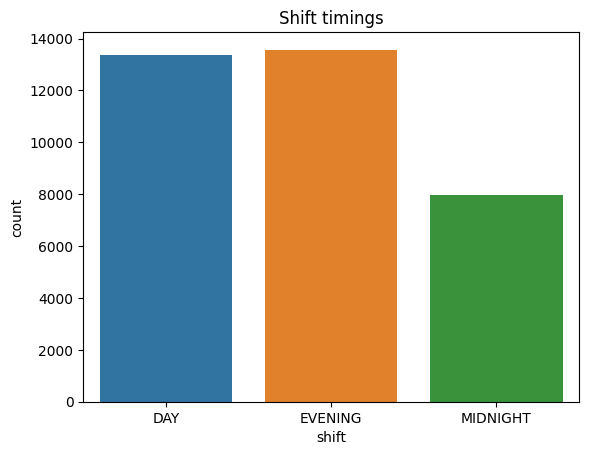

In [12]:
sns.countplot(data = df, x='shift')
plt.title('Shift timings')
plt.show()

# Result:
The above plot represents the count plot of the "shift " column of the dataset. Also we can conclude that "evening shift" has most count.

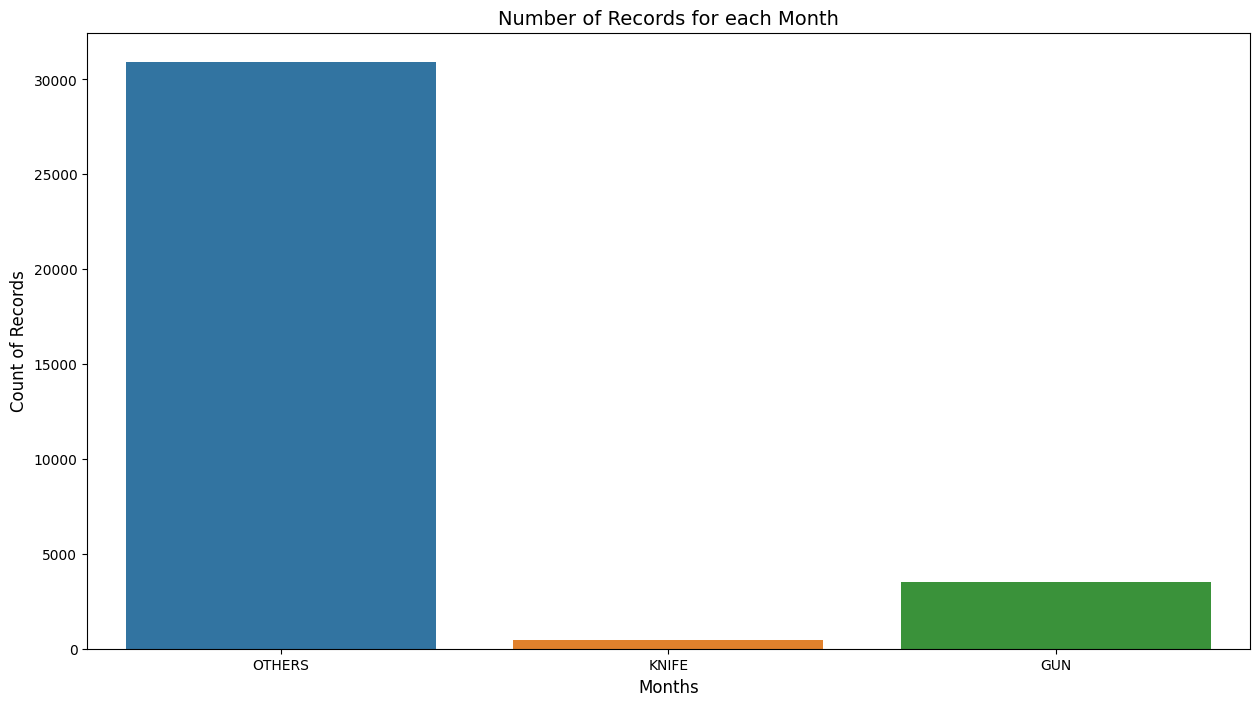

In [13]:
fig = plt.figure(figsize = (15,8))
plat_bar = sns.countplot(df, x= 'method')
plt.xlabel('Months', fontsize = 12)
plt.ylabel('Count of Records', fontsize = 12)
plt.title('Number of Records for each Month', fontsize = 14)
plt.show()

# Result:
The above plot represents the 'method' column of the dataset.Also we can conclude that the others column has most number of data items.

c:\Users\siddh\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


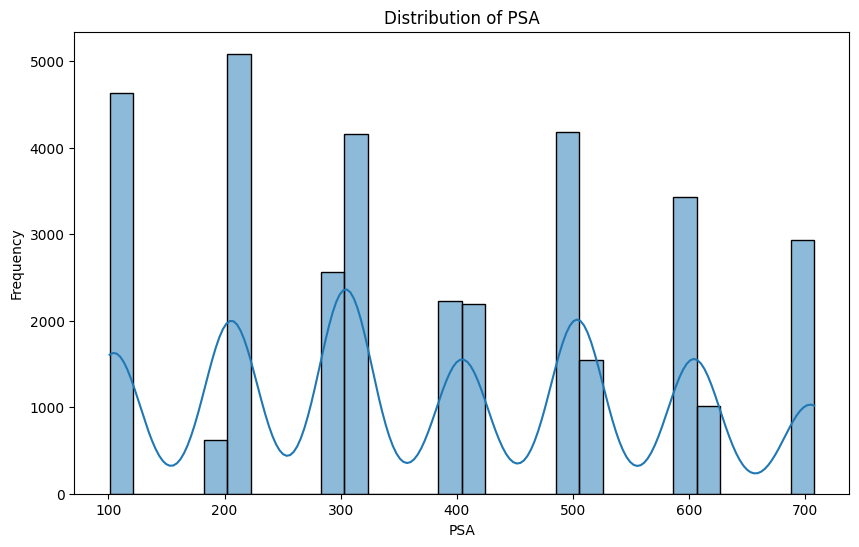

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['psa'], bins=30, kde=True)
plt.title('Distribution of PSA')
plt.xlabel('PSA')
plt.ylabel('Frequency')
plt.show()

# Result:
The above plot represents distribution plot of the PSA column of the dataset.

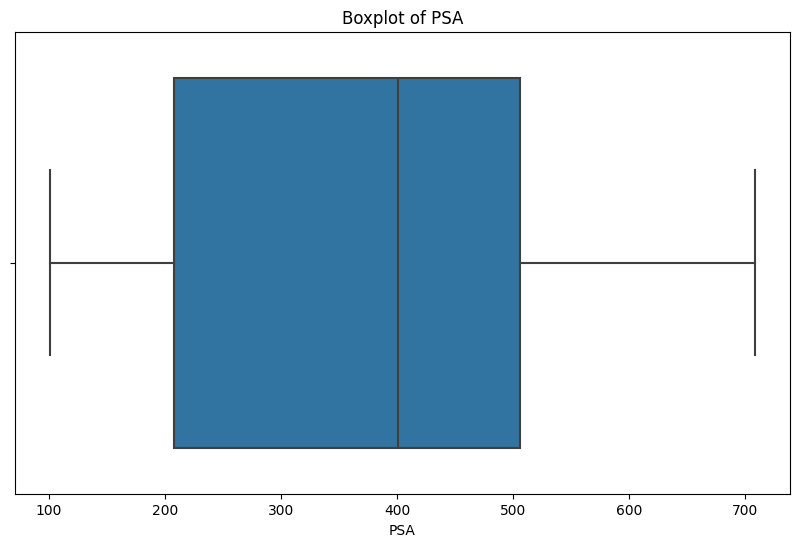

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['psa'])
plt.title('Boxplot of PSA')
plt.xlabel('PSA')
plt.show()

# Result:
The above plot represents the box plot PSA column of the dataset.

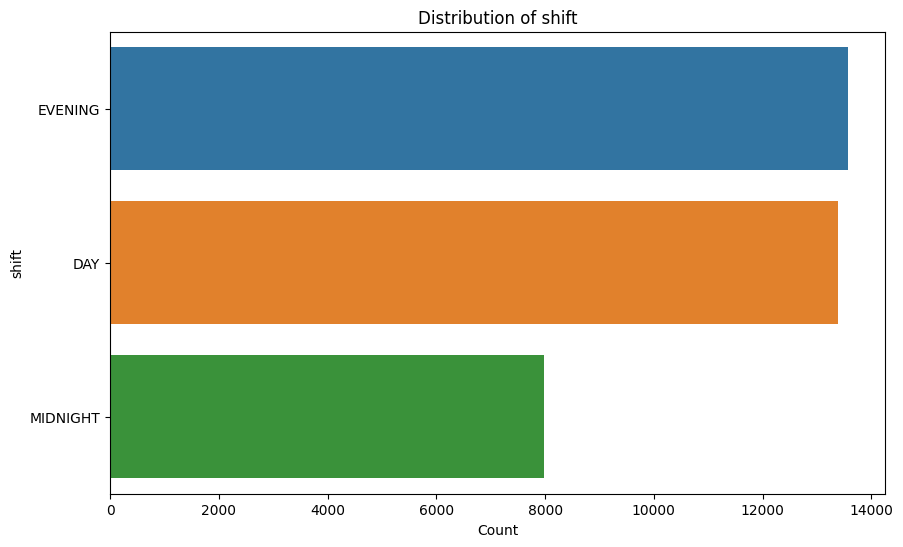

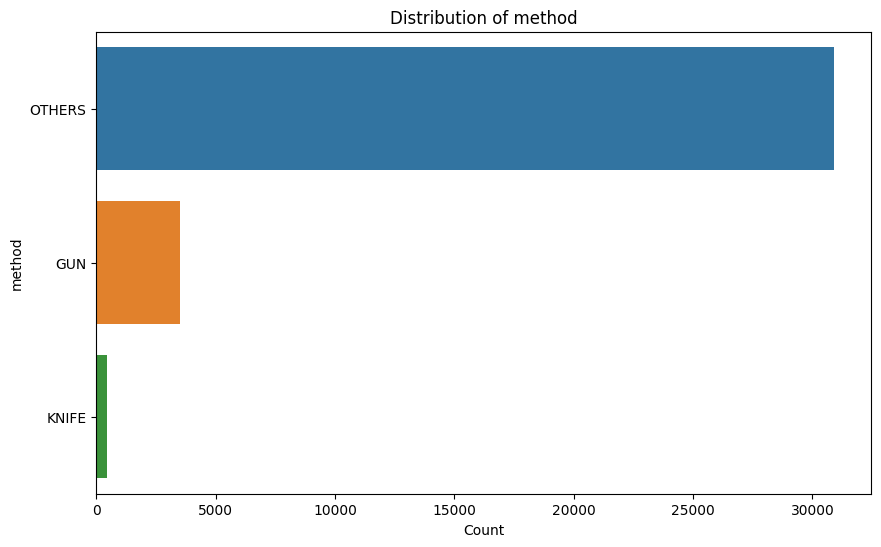

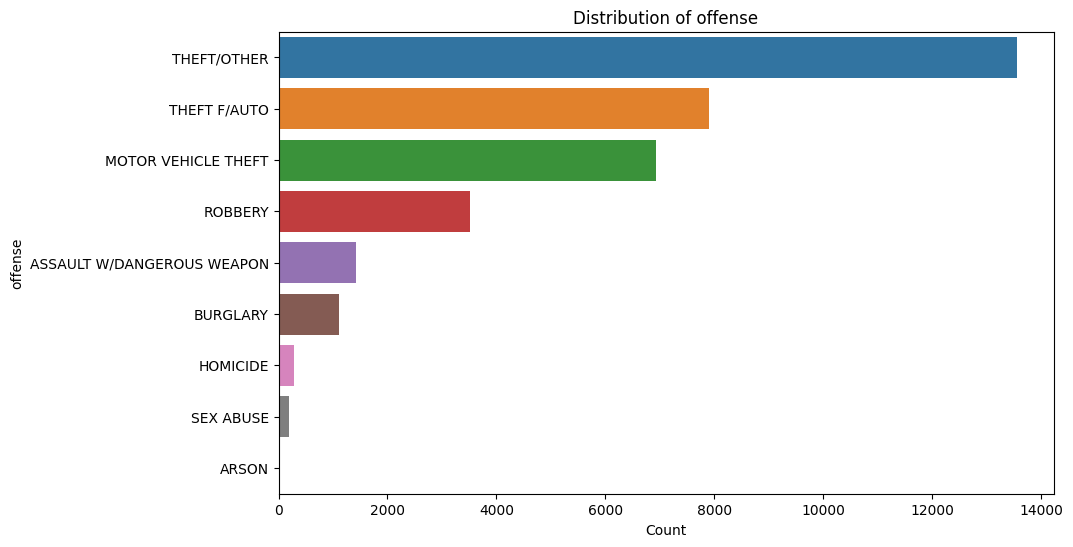

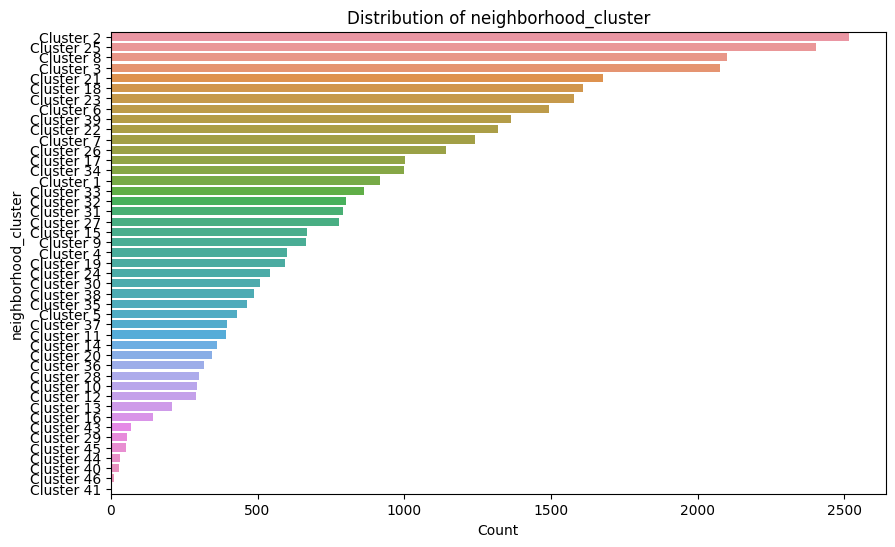

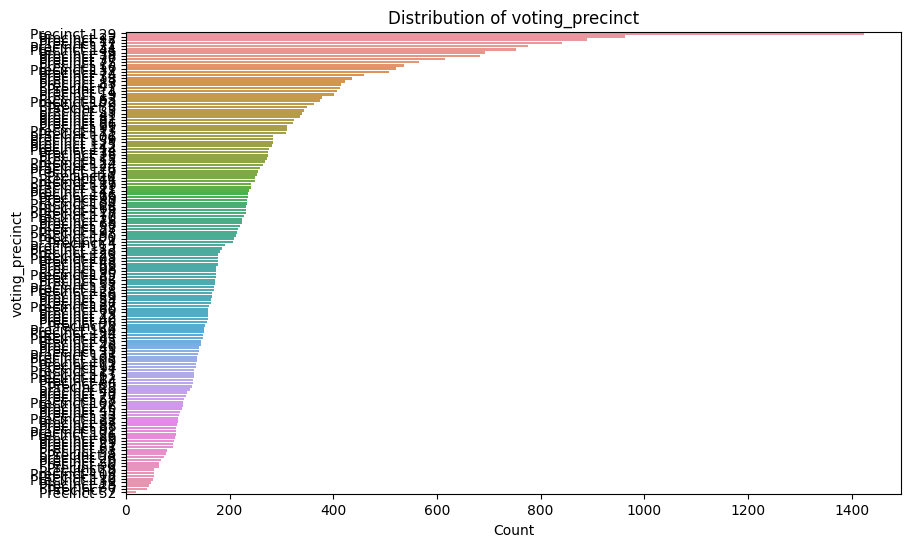

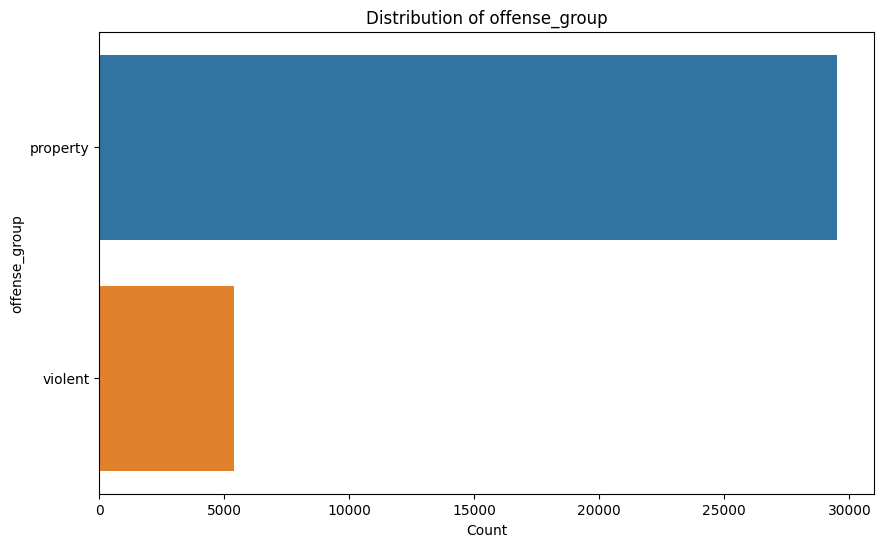

In [16]:
categorical_cols = ['shift', 'method', 'offense', 'neighborhood_cluster', 'voting_precinct', 'offense_group']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

# Result:
The above plots represent the various bar plots of the various columns of the datset.

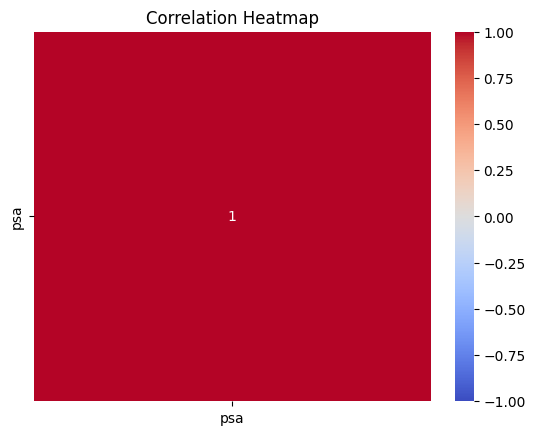

In [17]:
corr = df[['psa']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Result:
The above plot represents the correalation heatmap of the psa column of the dataset.

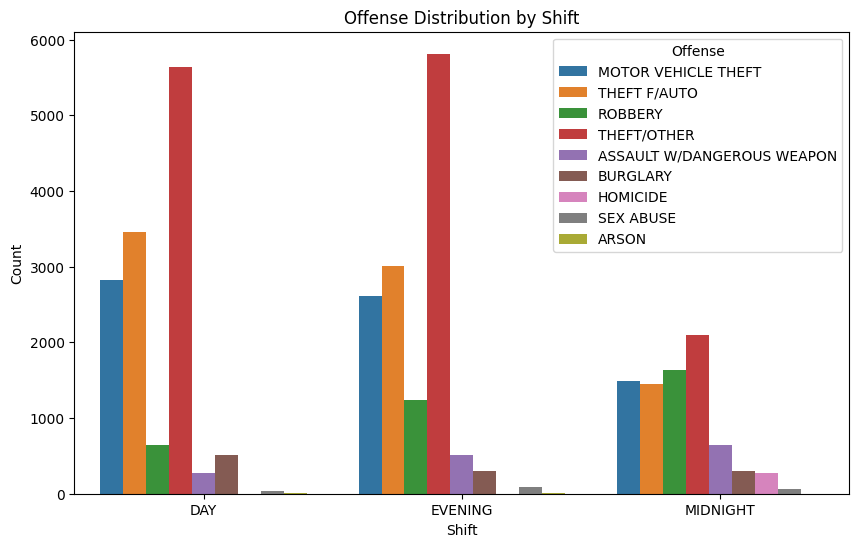

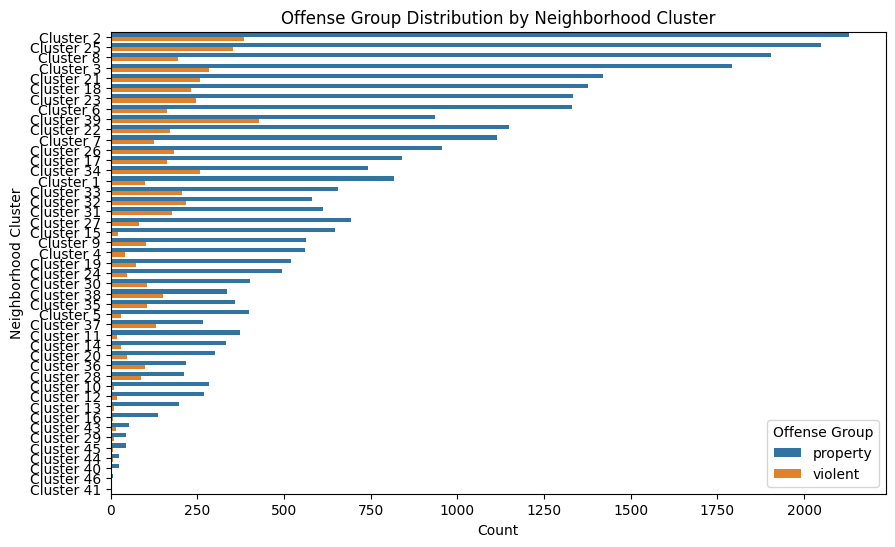

In [18]:
#Offense Distribution by Shift
plt.figure(figsize=(10, 6))
sns.countplot(x='shift', hue='offense', data=df)
plt.title('Offense Distribution by Shift')
plt.xlabel('Shift')
plt.ylabel('Count')
plt.legend(title='Offense')
plt.show()

# Geographical Analysis (Neighborhood Clusters)
plt.figure(figsize=(10, 6))
sns.countplot(y='neighborhood_cluster', hue='offense_group', data=df, order=df['neighborhood_cluster'].value_counts().index)
plt.title('Offense Group Distribution by Neighborhood Cluster')
plt.xlabel('Count')
plt.ylabel('Neighborhood Cluster')
plt.legend(title='Offense Group')
plt.show()

# Result:
The above plots represent the count plots for the columns of "shift" and "neighborhood cluster" of the dataset

# Conclusion:
from the above data analysis , we can understand the dataset that we used in the following program.By analysing the dataset, we can easily detect the crime analysis.